# Решающие деревья

In [ ]:
%pylab inline
import numpy as np
import pandas as pd
import pylab as plt
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set(style='whitegrid')
from sklearn.tree import DecisionTreeRegressor

Populating the interactive namespace from numpy and matplotlib


In [ ]:
SEED = 42

## Неустойчивость решающих деревьев

Решающие деревья — это алгоритмы, неустойчивые к изменениям обучающей выборки, т.е. при малейших её изменениях итоговый классификатор или регрессор может радикально измениться. Посмотрим, как будет меняться структура дерева при обучении на разных 90%-х подвыборках.

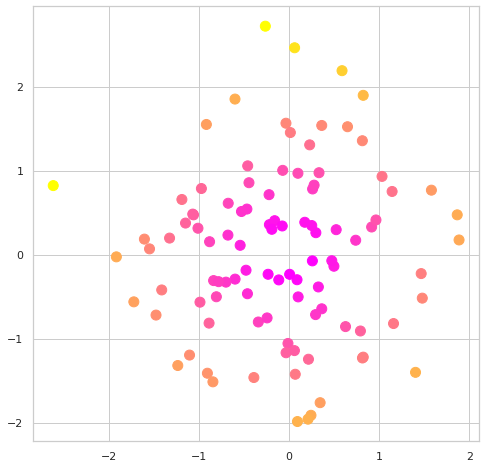

In [ ]:
np.random.seed(42)
data_x = np.random.normal(size=(100, 2))
data_y = (data_x[:, 0] ** 2 + data_x[:, 1] ** 2) ** 0.5 #
plt.figure(figsize=(8, 8))
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='spring')

In [ ]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

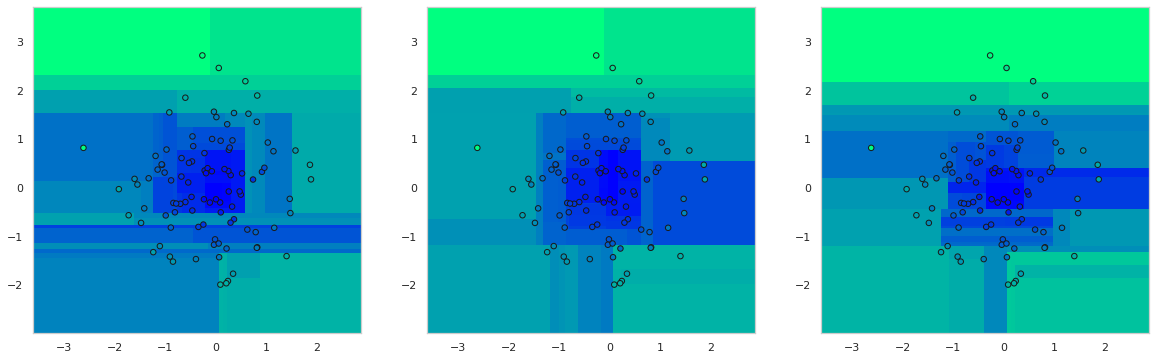

In [ ]:
plt.figure(figsize=(20, 6))
for i in range(3):
    clf = DecisionTreeRegressor(random_state=42)

    indecies = np.random.randint(data_x.shape[0], size=int(data_x.shape[0] * 0.9))
    clf.fit(data_x[indecies], data_y[indecies])
    xx, yy = get_grid(data_x)
    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.subplot2grid((1, 3), (0, i))
    plt.pcolormesh(xx, yy, predicted, cmap='winter')
    plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=30, cmap='winter', edgecolor='k')

# Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## Пример работы с Random Forest в Python

Рассмотрим работу с Random Forest в Python на примере задачи Регрессии. В качестве датасета будем использовать стандартный датасет из sklearn - бостонский датасет, на котором нужно предсказать цену за дом.

### Random Forest

Используем Random Forest Regressor "out-of-the-box" и посмотрим, какое значение метрики нам удастся выбить.

In [ ]:
data = load_boston()
X = pd.DataFrame(data=data['data'], columns=data['feature_names'])
y = data['target']

In [ ]:
random_forest = RandomForestRegressor(random_state = SEED)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [ ]:
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))

MAE:  2.05064705882353
MSE:  8.100796450980393


### Linear Regression

Используем алгоритм линейной регрессии "из коробки" и сравним метрики с Random Forest.

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))

MAE:  3.1890919658878474
MSE:  24.29111947497351


Random Forest работает лучше - как и предполагалось

### Out-of-Bag samples for Random Forest

Используем out-of-bag примеры из исходного датасета для проведения hold-out кросс-валидации.

In [ ]:
random_forest_out_of_bag = RandomForestRegressor(oob_score=True,random_state = SEED)

In [ ]:
random_forest_out_of_bag.fit(X_train, y_train)
print(random_forest_out_of_bag.oob_score_)

0.8363868903517421


Мы получили достаточно высокую метрику на отложенной выборке. Наш алгоритм не переобучился, так как его обобщающая способность (способность модели машинного обучения адекватно работать на новых, никогда ранее не виденных данных) при кросс-валидации на отложенной выборке (hold-out) осталась достаточно высокой.

Подробнее про техники кросс-валидации можно почитать здесь - https://neptune.ai/blog/cross-validation-in-machine-learning-how-to-do-it-right

Посмотрим на важность признаков. Обратим внимание, что Random Forest автоматически расчитывает эту важность, и ничего дополнительно указывать не нужно.

In [ ]:
random_forest_out_of_bag.feature_importances_

array([0.03821197, 0.00172814, 0.00738486, 0.00101151, 0.0147085 ,
       0.50399576, 0.01348791, 0.06148821, 0.00401428, 0.01482028,
       0.01752113, 0.01202073, 0.30960674])

In [ ]:
max(random_forest_out_of_bag.feature_importances_)

0.5039957551833468

### Визуализация для Random Forest

Визуализируем работу нашего алгоритма, взяв в качестве X - ниболее информативный признак, а в качестве y - таргет.

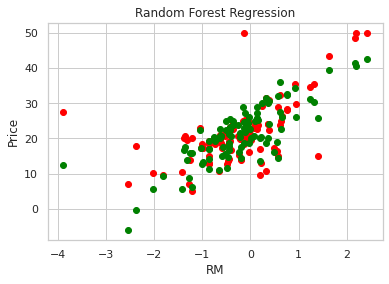

In [ ]:
plt.scatter(X_test.T[5], y_test, color = 'red')
plt.scatter(X_test.T[5], y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('RM')
plt.ylabel('Price')
plt.show()

Визуализируем одно из ансамблевых деревьев.

In [ ]:
from sklearn import tree

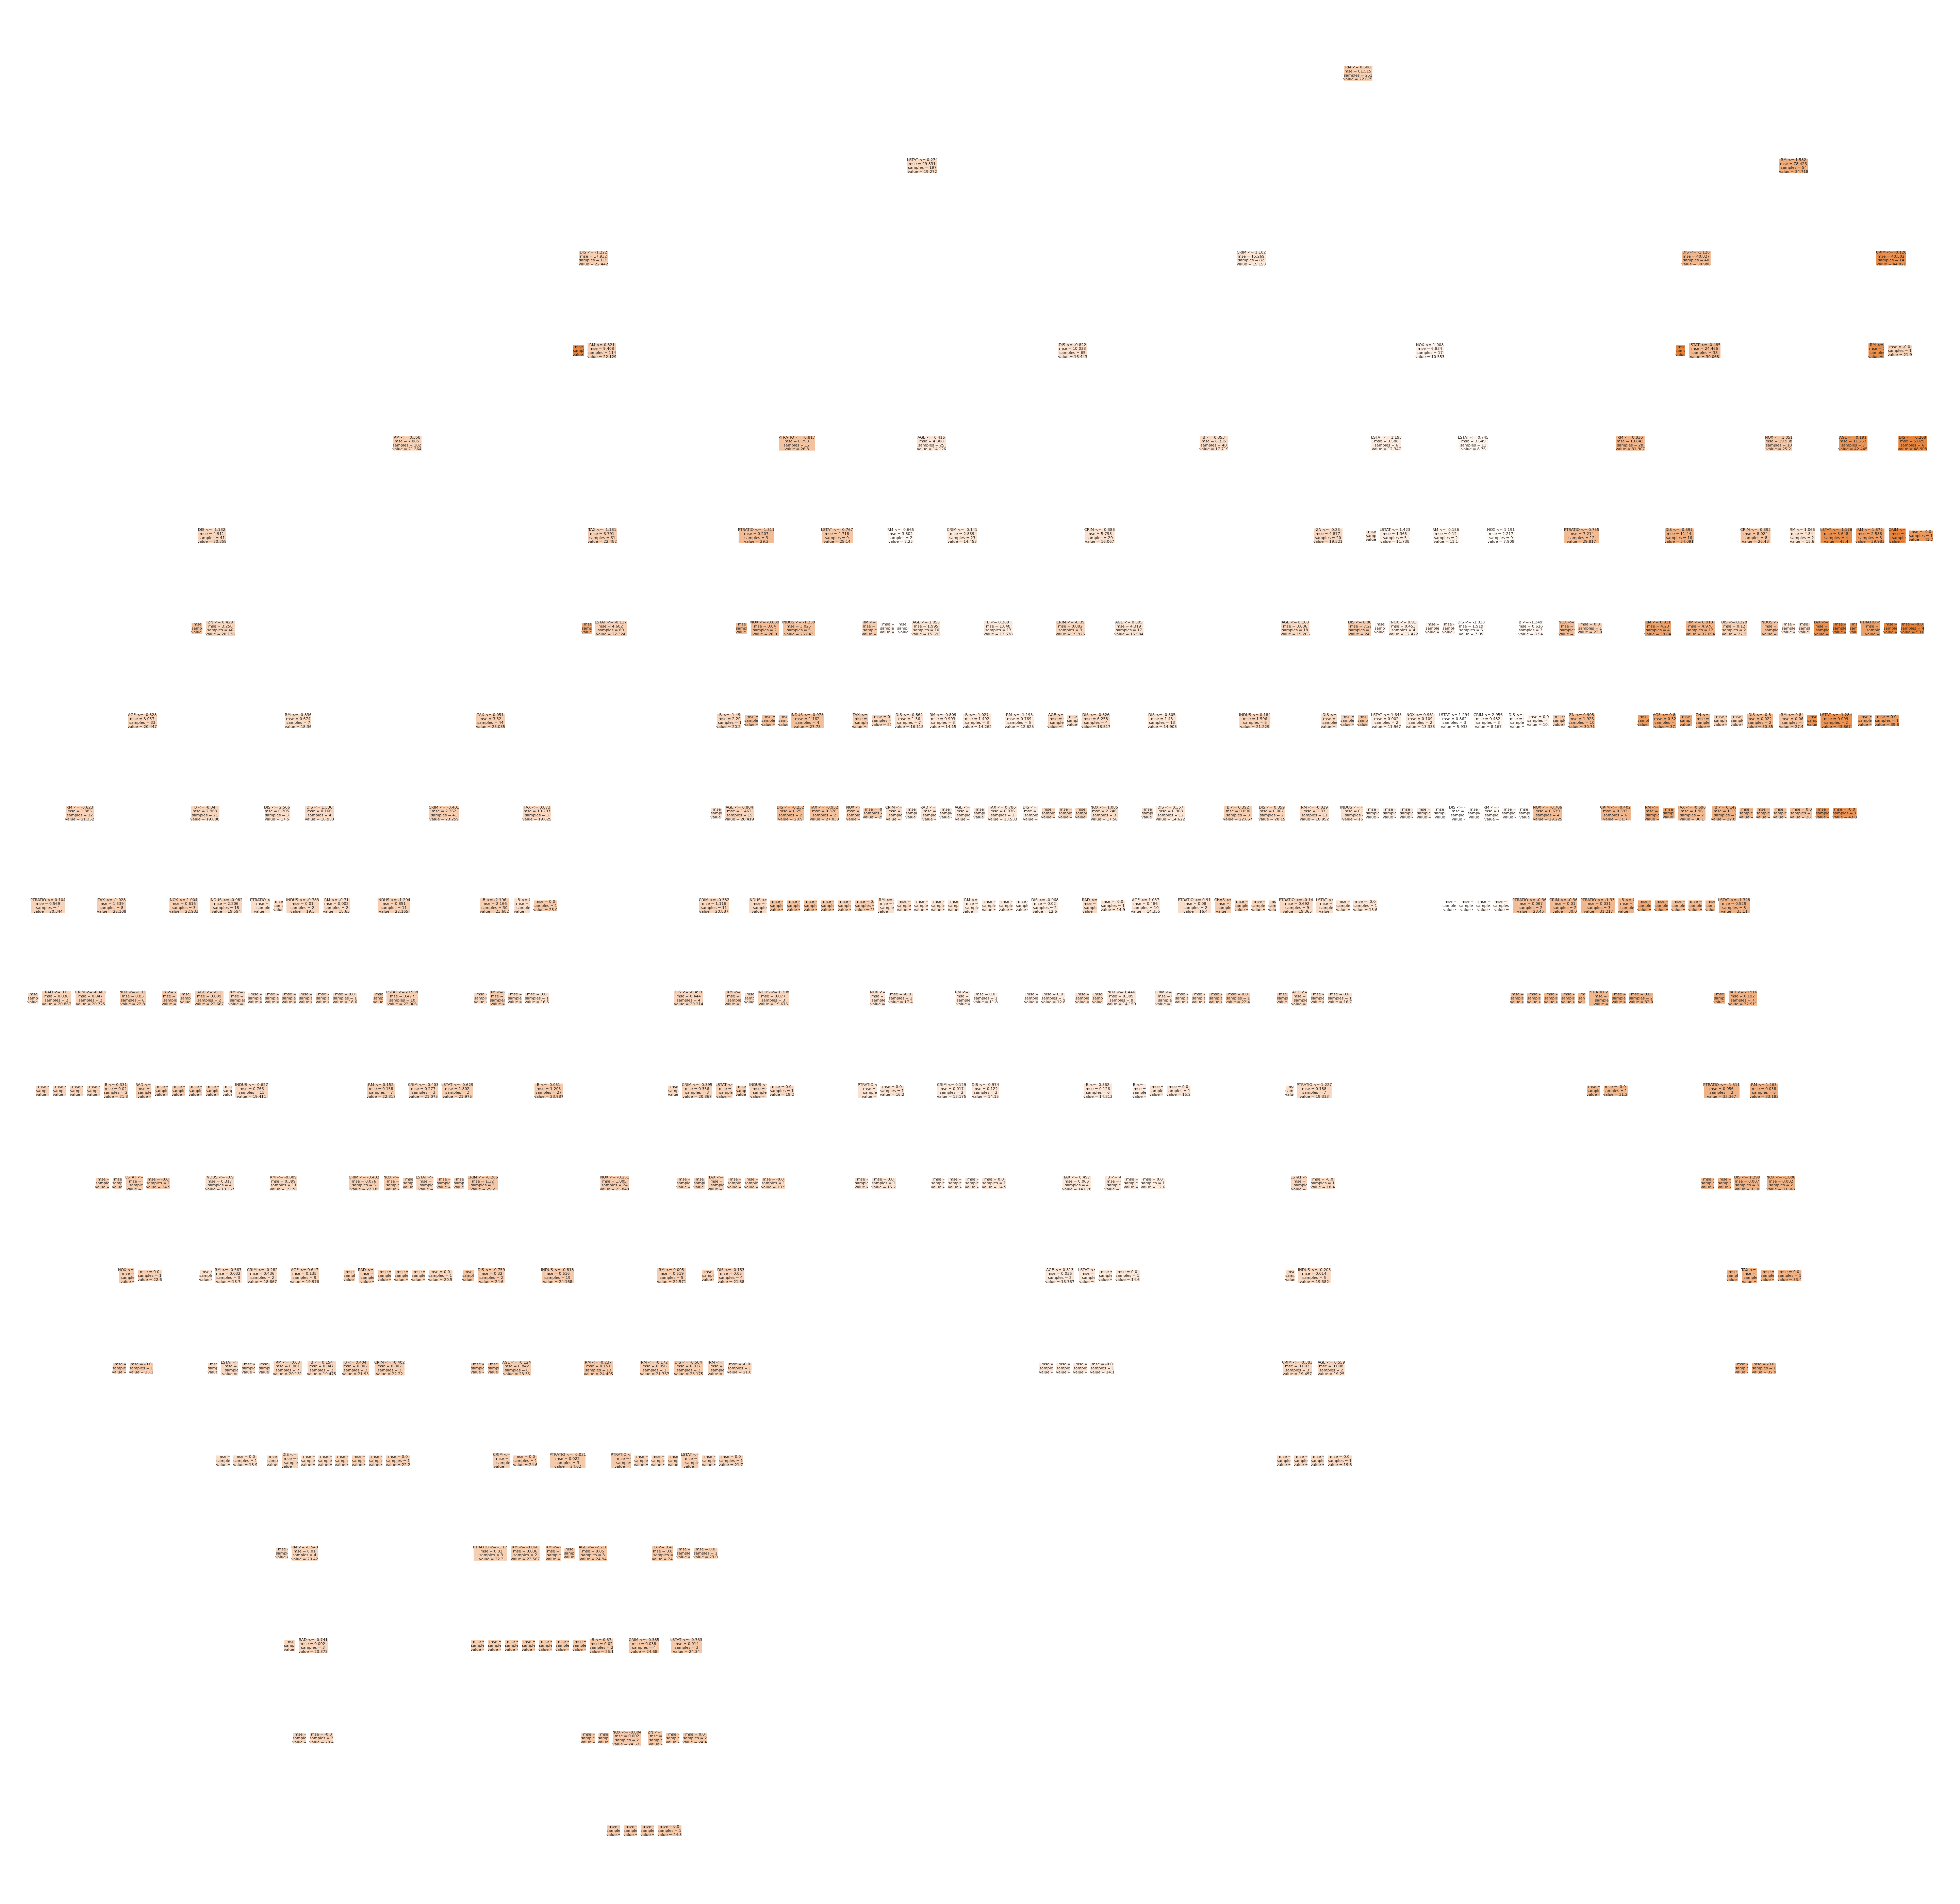

In [ ]:
fn=data.feature_names
cn=data.target
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (9,9), dpi=800)
tree.plot_tree(random_forest_out_of_bag.estimators_[0],
               feature_names = fn,
               class_names=cn,
               filled = True);

# Кейс

Датасет собран на основе данных банка Santander.

В этой задаче вам даны признаки транзакций (покупок). Вам нужно предсказать, состоятся эти покупки или нет. В силу того, что это банковские данные, никакой информации о значении столбцов у нас нет. Нам только лишь известно, что каждый из признаков - это число.

Используя предложенный набор данных при помощи любого алгоритма вам необходимо создать модель, которая будет предсказывать, состоится ли покупка, то есть какое значение (1 или 0) принимает переменная target у транзакций id в тестовой выборке.

Вам нужно добиться наилучшего показателя качества работы вашей модели: в данном случае – accuracy (чем ее значение ближе к 1, тем работа модели лучше). Данные уже разделены на обучающую и тестовую выборки. Обучите модель и сделайте предсказания на тестовой выборке.

Данные лежат в папке ds-masters-santander в Google Drive или на Kaggle.

https://www.kaggle.com/c/ds-masters-santander/data

## Данные

Мы имеем дело с задачей классификации.

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Вебинары SkillFactory/ds-masters-santander/santander_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Вебинары SkillFactory/ds-masters-santander/santander_test.csv')

In [ ]:
train.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,10.8917,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,9.1738,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,19.3038,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


Прежде чем начать работать мы:



1.   Посмотрим размер датасета
2.   Проверим его на пропуски
3.   Визуализируем признака
4.   Нормализуем признаки
5.   Посмотрим на баланс классов





In [ ]:
train.shape

(180181, 201)

Датасет большой, это хорошо

In [ ]:
train[train['target'] == 0].shape[0] / train[train['target'] == 1].shape[0]

8.970726578495933

In [ ]:
train.target.value_counts()

0    162110
1     18071
Name: target, dtype: int64

Не очень балансно, но ниже нижнего порога критерия несбалансированности (10 к 1), поэтому считаем что все нормально. Тем не меннее, будем держать это в голове.

In [ ]:
train.isna().any().sum() #проверяем есть ли пропуски

0

In [ ]:
test.isna().any().sum()

0

Пропусков нет.

In [ ]:
X = train.drop(['target'], axis = 1)
y = train['target']

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


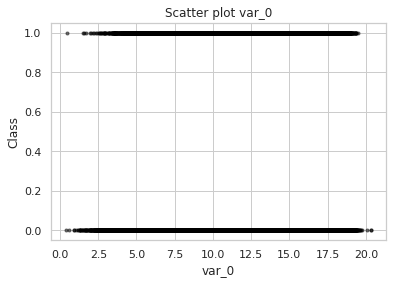

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


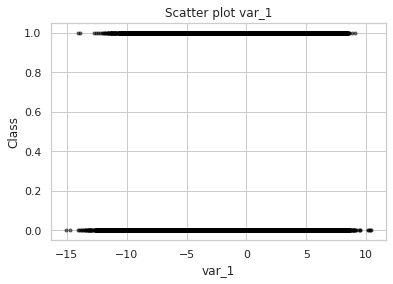

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


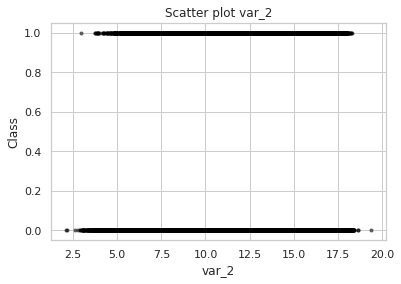

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


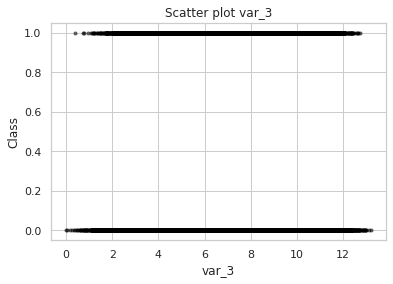

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


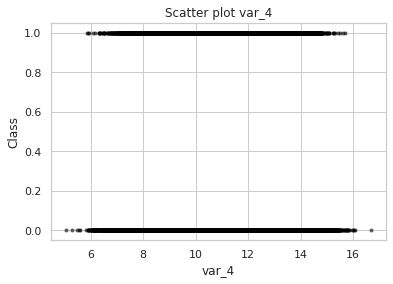

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


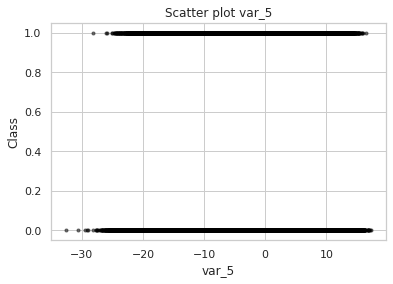

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


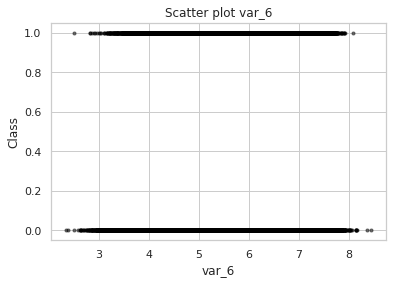

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


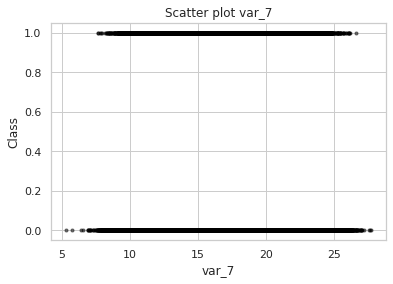

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


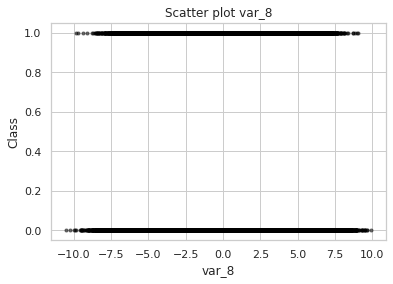

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


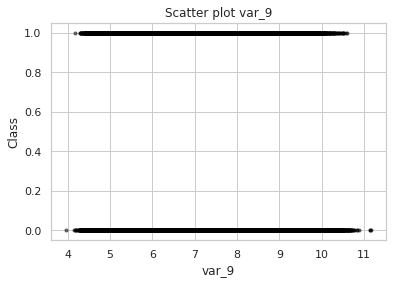

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


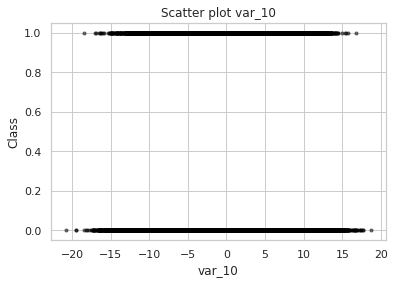

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


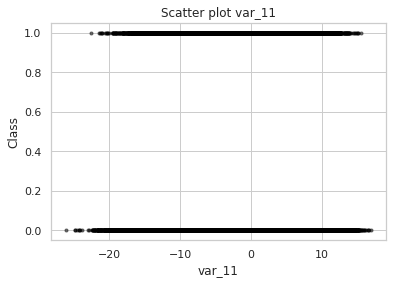

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


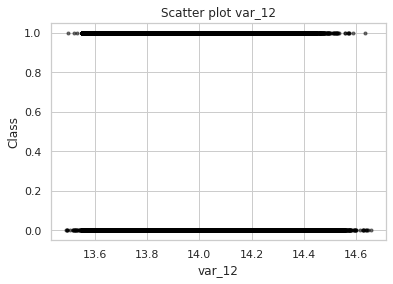

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


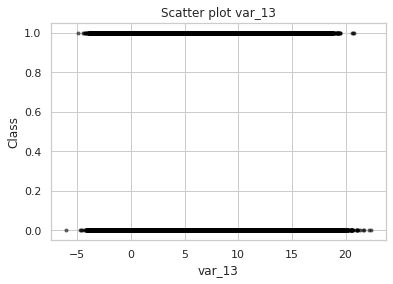

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


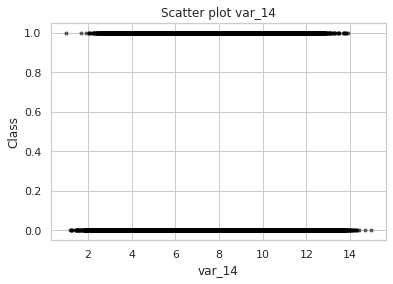

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


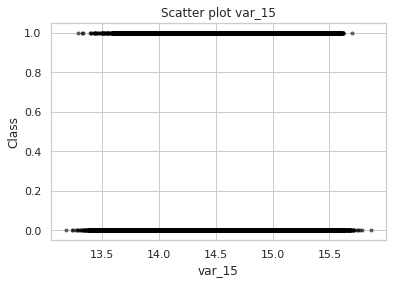

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


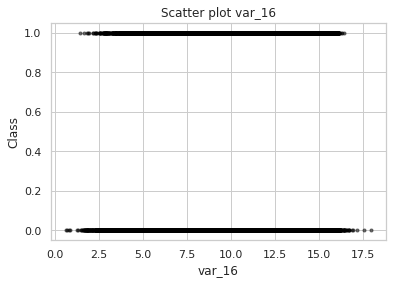

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


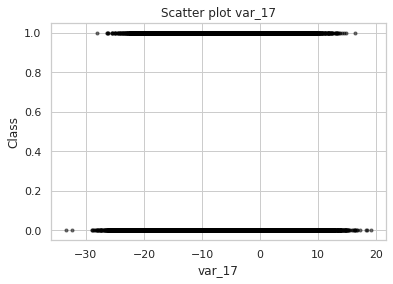

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


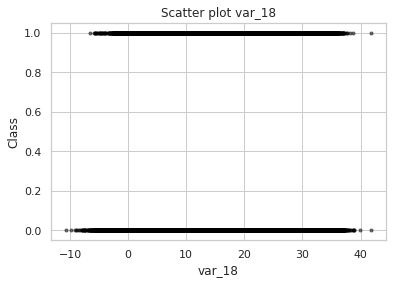

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


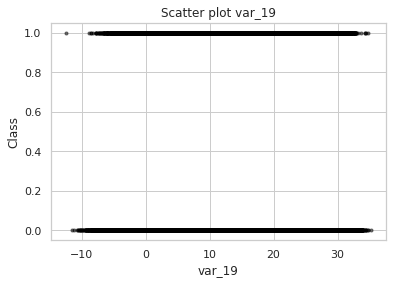

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


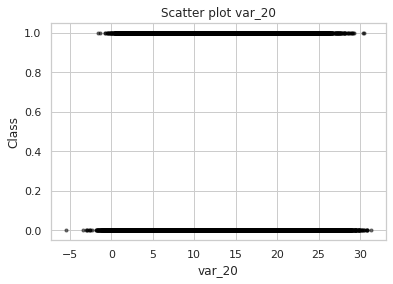

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


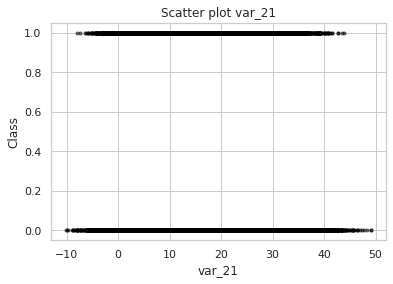

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


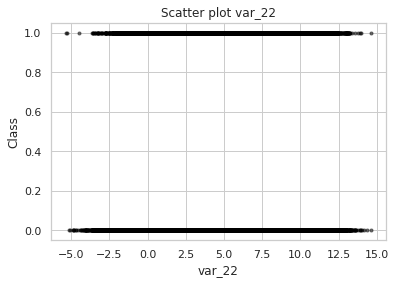

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


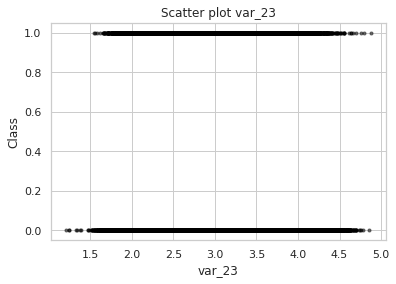

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


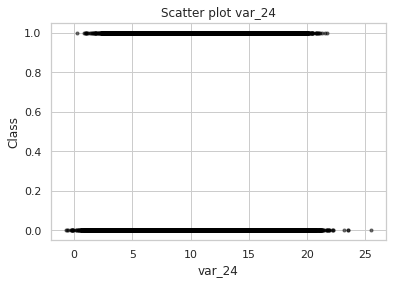

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


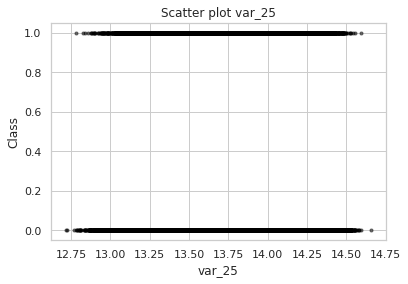

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


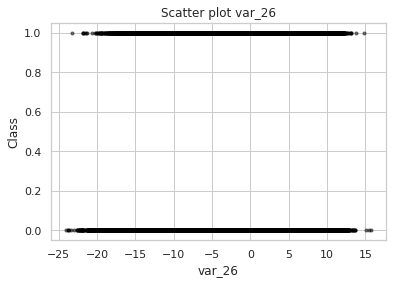

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


KeyboardInterrupt: ignored

In [ ]:
for i in X.columns: #визуализируем признаки, чтобы понять насколько они адекватные
    colors = (0,0,0)
    area = np.pi*3

    plt.scatter(X[i], y, s=area, c=colors, alpha=0.5)
    plt.title('Scatter plot ' + i)
    plt.xlabel(i)
    plt.ylabel('Class')
    plt.show()

Признаки адекватные, с ними можно работать.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=SEED)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Наивная модель

Изначально у нас баланс классов примерно 9 к 1, причем класса 0 больше. Логично предположить, что и в тестовых данных такой паттерн сохранится.

Построим наивную модель - будем всегда предсказывать 0, посмотрим какая метрика у нас получится.

In [ ]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

In [ ]:
predict = np.zeros(y_test.shape)

In [ ]:
print('Accuracy наивной модели: ', accuracy_score(y_test, predict))

Accuracy наивной модели:  0.8997141826456142


In [ ]:
confusion_matrix(y_test, predict)

array([[32423,     0],
       [ 3614,     0]])

Удивительно, наша наивная модель дает очень высокий результат на тестовой выборке (по сути мы решили задачу), однако остановиться на этом нельзя (почему?).

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

Обучим логистическую регрессию "из коробки".

Accuracy out-of-the-box логистической регрессии:  0.9136165607569997


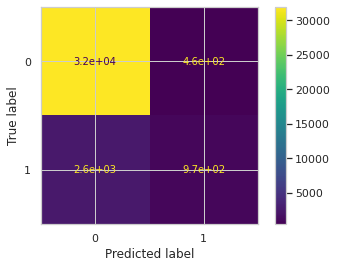

In [ ]:
lr = LogisticRegression(random_state=SEED)
lr.fit(X_train, y_train)
predict = lr.predict(X_test)
print('Accuracy out-of-the-box логистической регрессии: ', accuracy_score(y_test, predict))
plot_confusion_matrix(lr, X_test, y_test)

In [ ]:
confusion_matrix(y_test, predict)

array([[31958,   465],
       [ 2648,   966]])

Классно, нам удалось улучшить метрику, Logistic Regression научилась отличать два класса.

Попробуем поработать с признаками, выбросим лишние (зачем это делается?).

<BarContainer object of 200 artists>

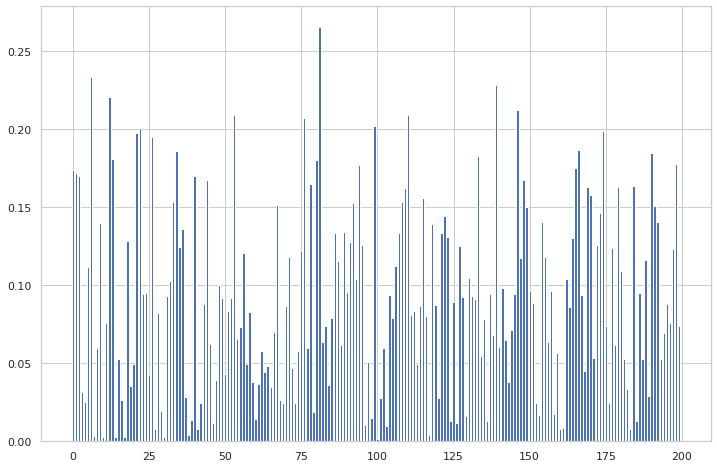

In [ ]:
plt.figure(figsize=(12, 8))
plt.bar(np.arange(X.shape[1]), np.squeeze(np.abs(lr.coef_)))

In [ ]:
features_to_save = np.where(np.abs(np.squeeze(lr.coef_)) >= 1e-1)[0]

In [ ]:
X_train_new = X_train[:, features_to_save]
X_test_new = X_test[:, features_to_save]

Accuracy out-of-the-box логистической регрессии на отобранных признаках:  0.9090934317507007


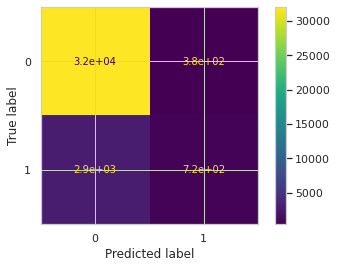

In [ ]:
lr = LogisticRegression(random_state=SEED)
lr.fit(X_train_new, y_train)
predict = lr.predict(X_test_new)
print('Accuracy out-of-the-box логистической регрессии на отобранных признаках: ', accuracy_score(y_test, predict))
plot_confusion_matrix(lr, X_test_new, y_test)

In [ ]:
confusion_matrix(y_test, predict)

array([[32039,   384],
       [ 2892,   722]])

Теперь добавим регуляризацию (зачем?).

Accuracy out-of-the-box логистической регрессии на отобранных признаках с регуляризацией:  0.9091766795238228


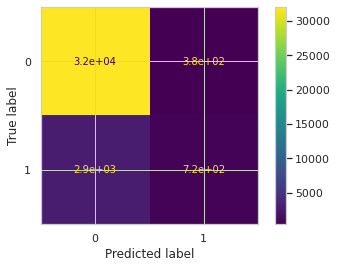

In [ ]:
lr = LogisticRegression(penalty='l1', C=0.1, solver='saga',random_state=SEED)
lr.fit(X_train_new, y_train)
predict = lr.predict(X_test_new)
print('Accuracy out-of-the-box логистической регрессии на отобранных признаках с регуляризацией: ', accuracy_score(y_test, predict))
plot_confusion_matrix(lr, X_test_new, y_test)

In [ ]:
confusion_matrix(y_test, predict)

array([[32046,   377],
       [ 2896,   718]])

Попробуем без выбрасывания признаков.

Accuracy out-of-the-box логистической регрессии c регуляризацией:  0.9136443100147071


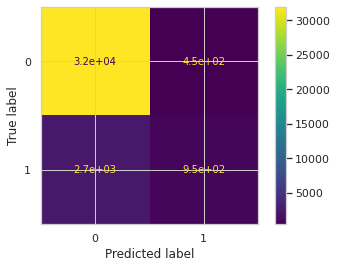

In [ ]:
lr = LogisticRegression(penalty='l1', C=0.1, solver='saga',random_state=SEED)
lr.fit(X_train, y_train)
predict = lr.predict(X_test)
print('Accuracy out-of-the-box логистической регрессии c регуляризацией: ', accuracy_score(y_test, predict))
plot_confusion_matrix(lr, X_test, y_test)

In [ ]:
confusion_matrix(y_test, predict)

array([[31973,   450],
       [ 2662,   952]])

## Random Forest Classifier

У нас уже получились очень классные результаты. Проверим можно ли еще улучшить их, использовав Random Forest в качестве нашего алгоритма.

Обучать Random Forest лучше всего не в Colab, а локально, так как ваш процессор распараллелит обучение (в отличие от Colab).

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Out-of-Bag score: 0.8998848373848374
Accuracy: 0.8997419319033216


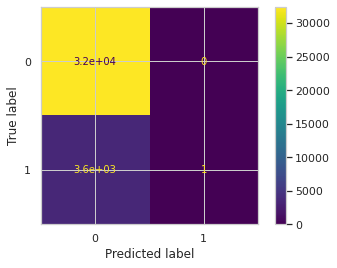

In [ ]:
rfc = RandomForestClassifier(oob_score=True,n_jobs = -1, random_state = SEED)
rfc.fit(X_train, y_train)
print('Out-of-Bag score:',rfc.oob_score_)
predict = rfc.predict(X_test)
print('Accuracy:',accuracy_score(y_test, predict))
plot_confusion_matrix(rfc, X_test, y_test)

In [ ]:
confusion_matrix(y_test, predict)

array([[32423,     0],
       [ 3613,     1]])

Random Forest отработал не лучше, чем наша наивная модель. Редко, но такое случается. Попробуем исправить эту ситуацию, поработав с весами классов.

In [ ]:
rfc = RandomForestClassifier(class_weight = 'balanced',oob_score=True,n_jobs = -1, random_state = SEED)
rfc.fit(X_train, y_train)
print('Out-of-Bag score:',rfc.oob_score_)
predict = rfc.predict(X_test)
print('Accuracy:',accuracy_score(y_test, predict))
plot_confusion_matrix(rfc, X_test, y_test)

Как можно заметить это не сработало, Random Forest работает плохо, предсказывая константу. Возможно мы чего-то не видим, давайте попробуем использовать GridSearchCV для подбора оптимальных гиперпараметров.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rfc = RandomForestClassifier(n_jobs = -1, random_state = SEED)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'class_weight': ['balanced_subsample', None]
}

In [ ]:
GSCV = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
GSCV.fit(X_train, y_train)

In [ ]:
GSCV.best_params_

In [ ]:
GSCV.best_score_

И снова нам не удалось улучшить метрику.

Почему так происходит и как это исправить?

## Summary по кейсу

Во время поиска работы/самой работы вы будете часто сталкиваться с множеством странных/неочевидных/раздражающих задач (как этот кейс), которые могут не решиться с первой попытки. Однако стоит помнить, что в Data Science работа над любой задачей - итеративный процесс, в котором может быть очень много проб и ошибок.


Алгоритм работы над ЛЮБОЙ ML задачей:


1. Сделайте EDA (даже если сходу кажется, что все хорошо, так как EDA никогда не бывает лишним)
2. Постройте наивную модель и подумайте, какие ML алгоритмы вы можете использовать для решения этой задачи
3. Постройте линейную модель (линейная или логистическая регрессия), посмотрите на метрики - они будут бейзлайном для более сложных алгоритмов
4. Random Forest
5. Бустинг/Стекинг
6. Возможно что-то еще (вдруг вы придумаете что-то новое)
7. Выберите модель, которая как вам кажется является наилучшей (даже если это обычная логистическая регрессия, как в нашем кейсе)


Также, для удобства работы стоит попробовать какой-нибудь MLOps (практика, помогающая управлять производственным жизненным циклом ML и DL проект) инструмент (например, neptune.ai или cnvrg.io). Вы будете приятно удивлены, насколько они упростят вам жизнь и процесс ресерча.

